In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("DataSet/housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
from sklearn.model_selection import train_test_split
# x is data frame without target variable
x = data.drop(['median_house_value'], axis = 1)
# y is target variable
y = data['median_house_value']


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
train_data = x_train.join(y_train)

In [11]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9647,-120.84,37.05,8.0,1944.0,283.0,814.0,276.0,5.3988,INLAND,165500.0
13320,-117.67,34.06,26.0,1592.0,429.0,1182.0,365.0,2.4583,INLAND,110400.0
19931,-119.33,36.31,15.0,1472.0,228.0,892.0,257.0,5.3909,INLAND,113000.0
18365,-122.12,37.28,21.0,349.0,64.0,149.0,56.0,5.8691,<1H OCEAN,360000.0
5543,-118.40,33.98,36.0,2526.0,452.0,996.0,441.0,5.6110,<1H OCEAN,456600.0
...,...,...,...,...,...,...,...,...,...,...
4242,-118.33,34.11,38.0,3495.0,1100.0,1939.0,994.0,2.2148,<1H OCEAN,438300.0
9839,-121.92,36.61,27.0,1619.0,352.0,831.0,344.0,4.3000,NEAR OCEAN,226400.0
19021,-121.98,38.34,13.0,3616.0,672.0,2022.0,652.0,4.0536,INLAND,134800.0
1036,-120.79,38.43,40.0,1391.0,246.0,546.0,214.0,3.9107,INLAND,129800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

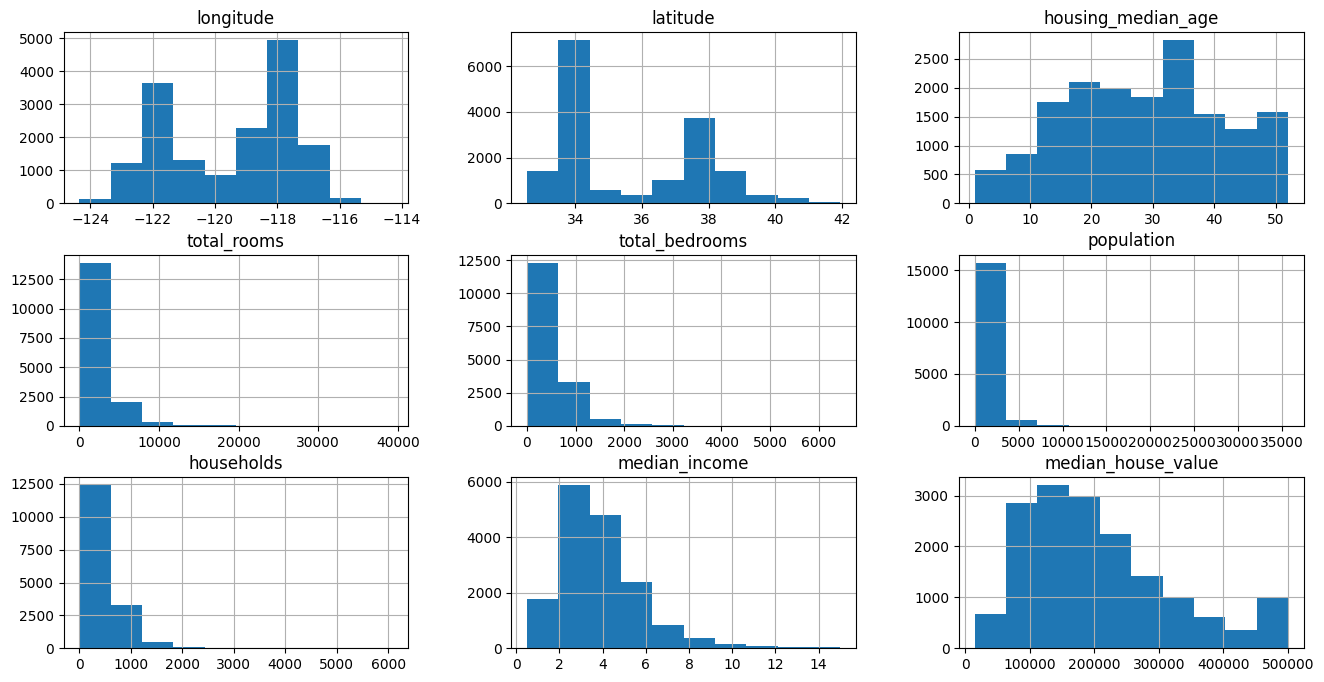

In [12]:
train_data.hist(figsize=(16,8))

In [13]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
9647,-120.84,37.05,8.0,1944.0,283.0,814.0,276.0,5.3988,INLAND,165500.0
13320,-117.67,34.06,26.0,1592.0,429.0,1182.0,365.0,2.4583,INLAND,110400.0
19931,-119.33,36.31,15.0,1472.0,228.0,892.0,257.0,5.3909,INLAND,113000.0
18365,-122.12,37.28,21.0,349.0,64.0,149.0,56.0,5.8691,<1H OCEAN,360000.0
5543,-118.40,33.98,36.0,2526.0,452.0,996.0,441.0,5.6110,<1H OCEAN,456600.0
...,...,...,...,...,...,...,...,...,...,...
4242,-118.33,34.11,38.0,3495.0,1100.0,1939.0,994.0,2.2148,<1H OCEAN,438300.0
9839,-121.92,36.61,27.0,1619.0,352.0,831.0,344.0,4.3000,NEAR OCEAN,226400.0
19021,-121.98,38.34,13.0,3616.0,672.0,2022.0,652.0,4.0536,INLAND,134800.0
1036,-120.79,38.43,40.0,1391.0,246.0,546.0,214.0,3.9107,INLAND,129800.0


In [14]:
train_data.corr(numeric_only = True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924905,-0.113629,0.047556,0.069102,0.102076,0.057408,-0.011907,-0.045482
latitude,-0.924905,1.000000,0.015384,-0.038394,-0.066036,-0.109527,-0.071741,-0.082166,-0.144299
housing_median_age,-0.113629,0.015384,1.000000,-0.360620,-0.319984,-0.295041,-0.302113,-0.125042,0.100278
total_rooms,0.047556,-0.038394,-0.360620,1.000000,0.930929,0.856324,0.919390,0.199295,0.137829
total_bedrooms,0.069102,-0.066036,-0.319984,0.930929,1.000000,0.877926,0.980288,-0.005438,0.052804
population,0.102076,-0.109527,-0.295041,0.856324,0.877926,1.000000,0.906710,0.004530,-0.021810
households,0.057408,-0.071741,-0.302113,0.919390,0.980288,0.906710,1.000000,0.015229,0.067358
median_income,-0.011907,-0.082166,-0.125042,0.199295,-0.005438,0.004530,0.015229,1.000000,0.690128
median_house_value,-0.045482,-0.144299,0.100278,0.137829,0.052804,-0.021810,0.067358,0.690128,1.000000


<Axes: >

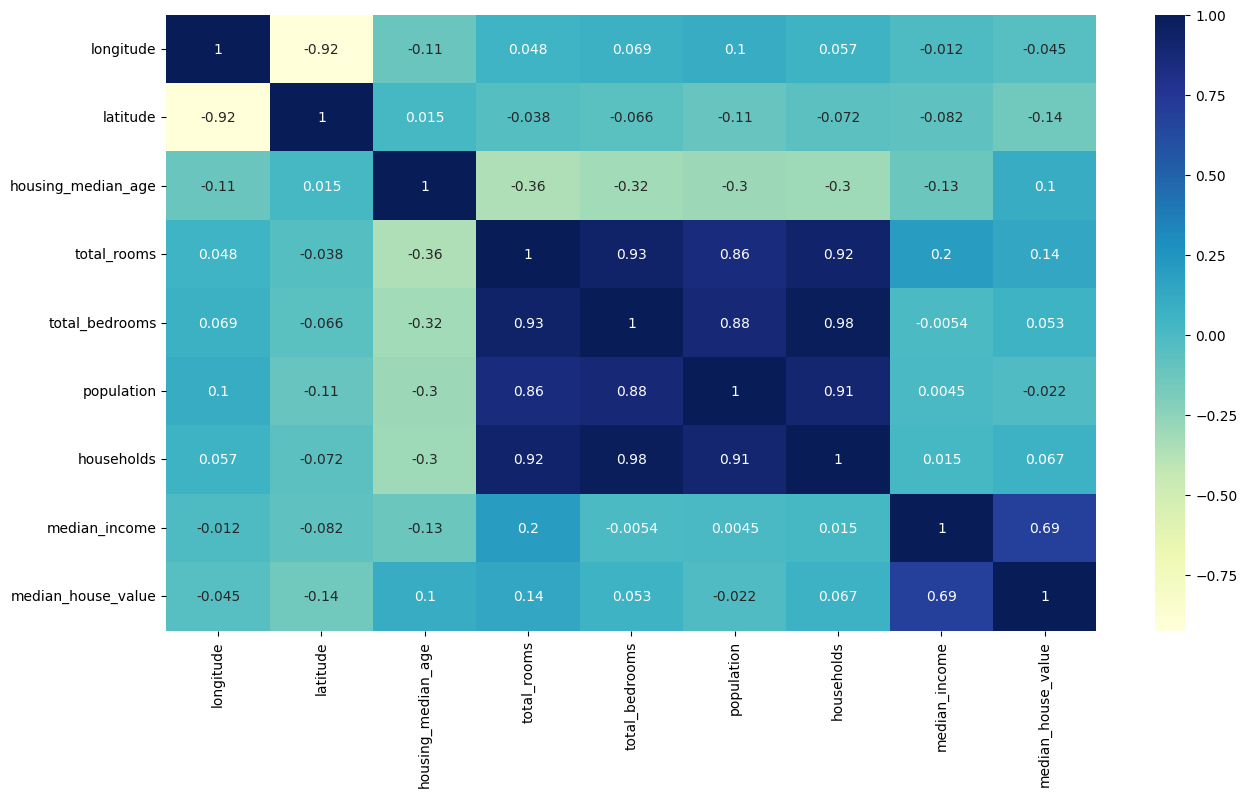

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True, cmap= "YlGnBu")

In [16]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

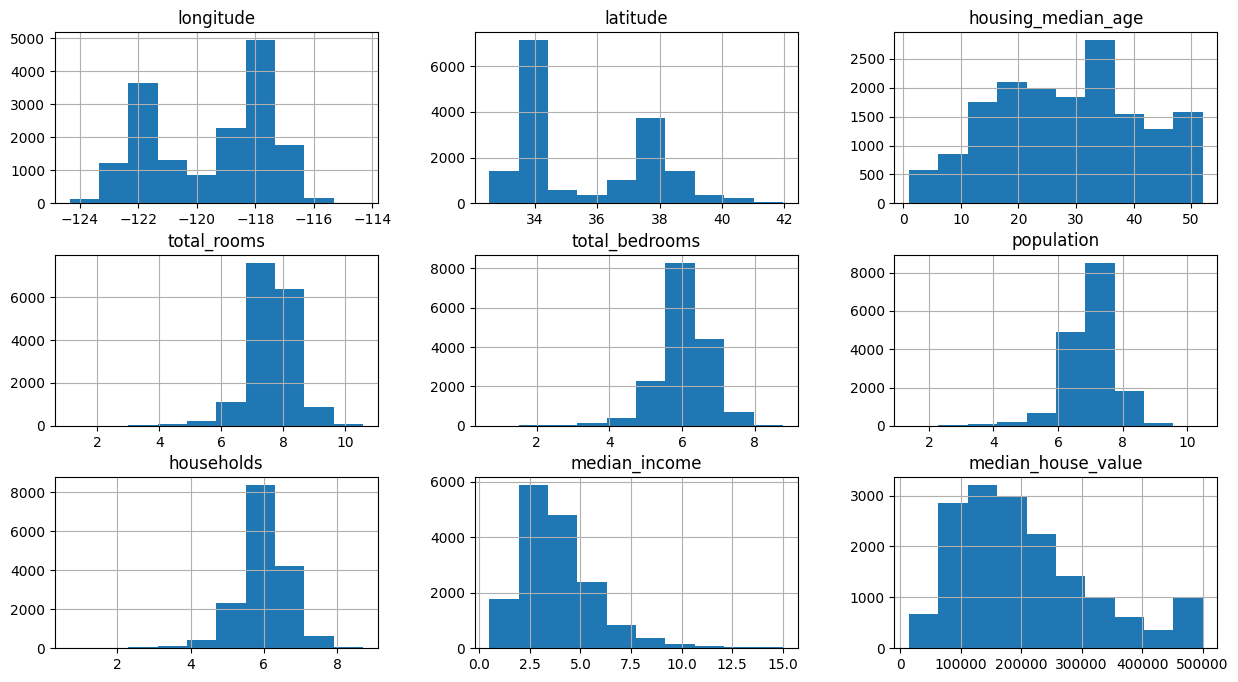

In [17]:
train_data.hist(figsize=(15,8))

In [18]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7223
INLAND        5196
NEAR OCEAN    2096
NEAR BAY      1826
ISLAND           5
Name: count, dtype: int64

In [19]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis=1)

In [20]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9647,-120.84,37.05,8.0,7.573017,5.648974,6.703188,5.624018,5.3988,165500.0,0,1,0,0,0
13320,-117.67,34.06,26.0,7.373374,6.063785,7.075809,5.902633,2.4583,110400.0,0,1,0,0,0
19931,-119.33,36.31,15.0,7.295056,5.433722,6.794587,5.552960,5.3909,113000.0,0,1,0,0,0
18365,-122.12,37.28,21.0,5.857933,4.174387,5.010635,4.043051,5.8691,360000.0,1,0,0,0,0
5543,-118.40,33.98,36.0,7.834788,6.115892,6.904751,6.091310,5.6110,456600.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242,-118.33,34.11,38.0,8.159375,7.003974,7.570443,6.902743,2.2148,438300.0,1,0,0,0,0
9839,-121.92,36.61,27.0,7.390181,5.866468,6.723832,5.843544,4.3000,226400.0,0,0,0,0,1
19021,-121.98,38.34,13.0,8.193400,6.511745,7.612337,6.481577,4.0536,134800.0,0,1,0,0,0
1036,-120.79,38.43,40.0,7.238497,5.509388,6.304449,5.370638,3.9107,129800.0,0,1,0,0,0


<Axes: >

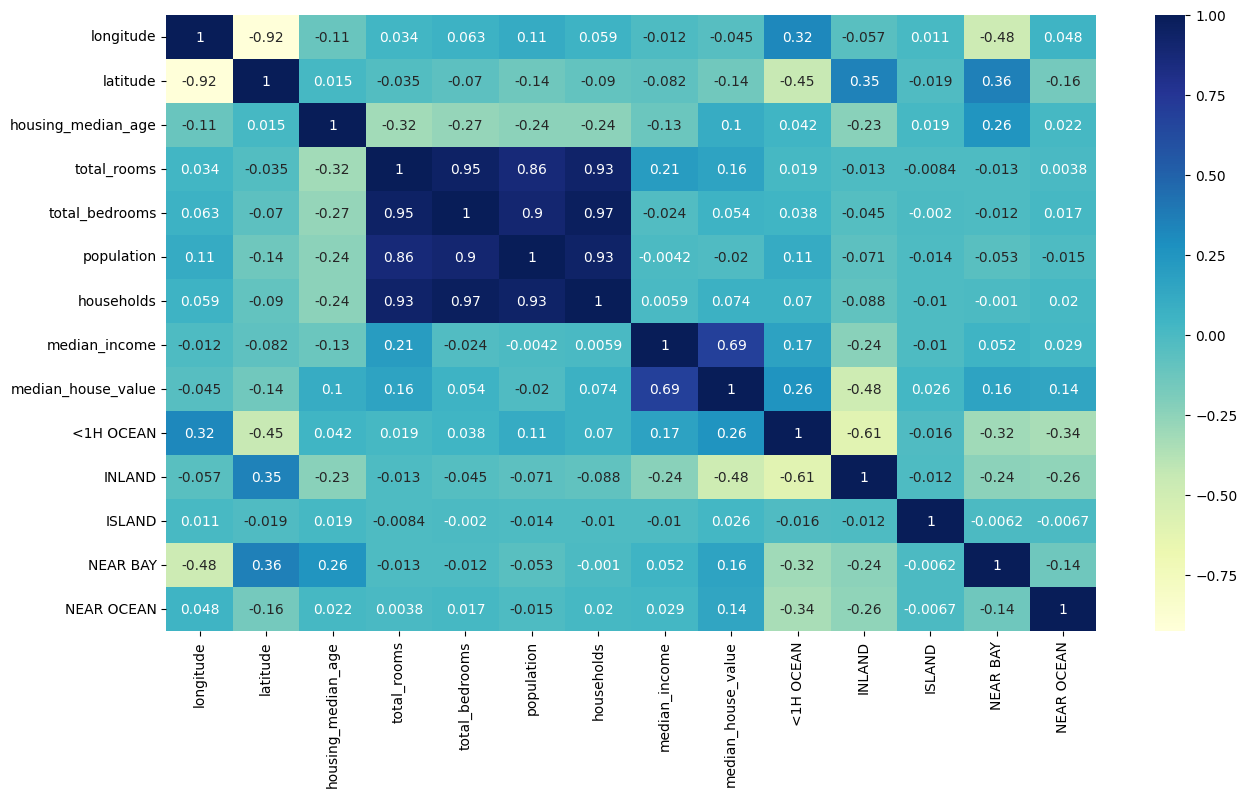

In [21]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True, cmap= "YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

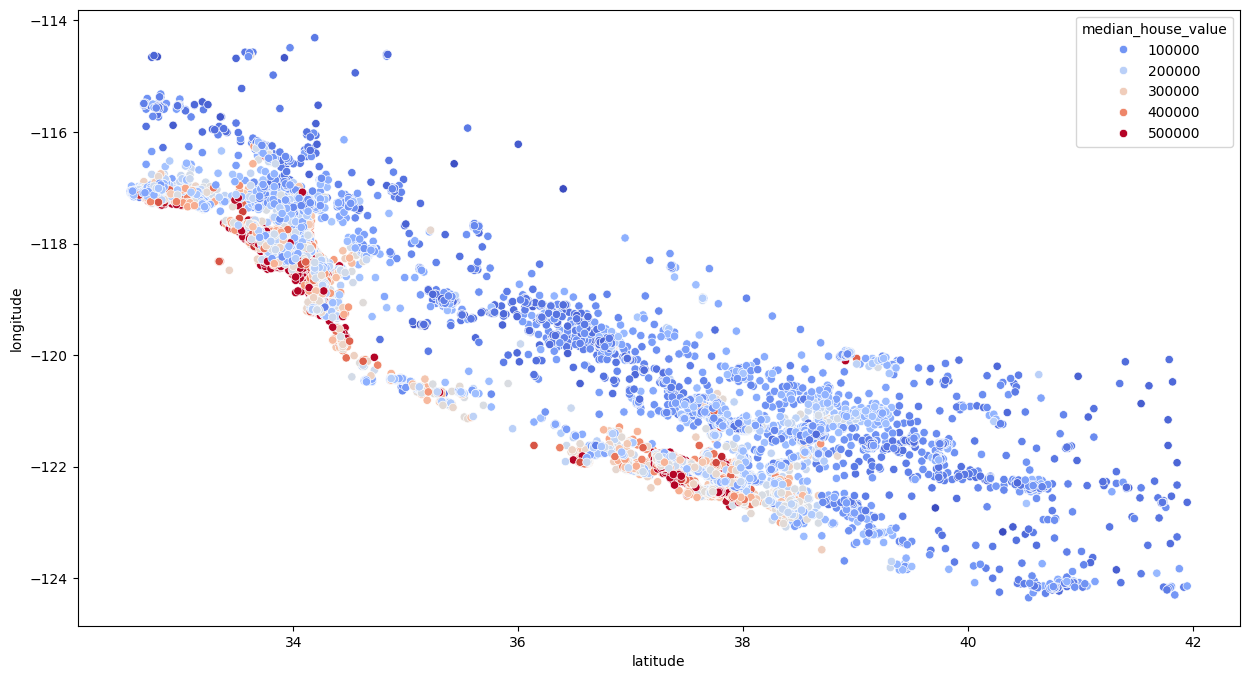

In [23]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y= "longitude", data= train_data, hue= "median_house_value", palette= "coolwarm")